## Import Dataset 

In [209]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
baseline_data = pd.read_csv(file_path)

# Display the first few rows
# print(baseline_data.head())

In [210]:
import pandas as pd
from tabulate import tabulate

# Assuming baseline_data is already defined
nutrition_frequencies = baseline_data.groupby(['Time', 'Nutrition_Status']).size().unstack(fill_value=0)

# Print as a table using tabulate
print("\nFrequencies of Nutrition_Status at each time point:")
# print(tabulate(nutrition_frequencies, headers='keys', tablefmt='grid'))
nutrition_frequencies


Frequencies of Nutrition_Status at each time point:


Nutrition_Status,N,S,U,US,USW,UW,W
Time,,,,,,,
2002,922,329,39,372,147,121,64


In [211]:
# Group by 'Time', 'ch_sex', and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status by gender at each time point:")
# print(nutrition_frequencies)
nutrition_frequencies


Frequencies of Nutrition_Status by gender at each time point:


Nutrition_Status,N,S,U,US,USW,UW,W
ch_sex,,,,,,,
Female,489,134,22,164,56,56,26
Male,433,195,17,208,91,65,38


In [212]:
# Group by 'Time', 'ch_sex', and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['Region', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status by gender at each time point:")
# print(nutrition_frequencies)
nutrition_frequencies


Frequencies of Nutrition_Status by gender at each time point:


Nutrition_Status,N,S,U,US,USW,UW,W
Region,,,,,,,
Addis Ababa,190,56,6,27,6,6,9
Amhara,143,89,12,96,36,13,9
Oromiya,167,53,9,94,37,25,14
SNNP,220,74,8,76,39,63,18
Tigray,202,57,4,79,29,14,14


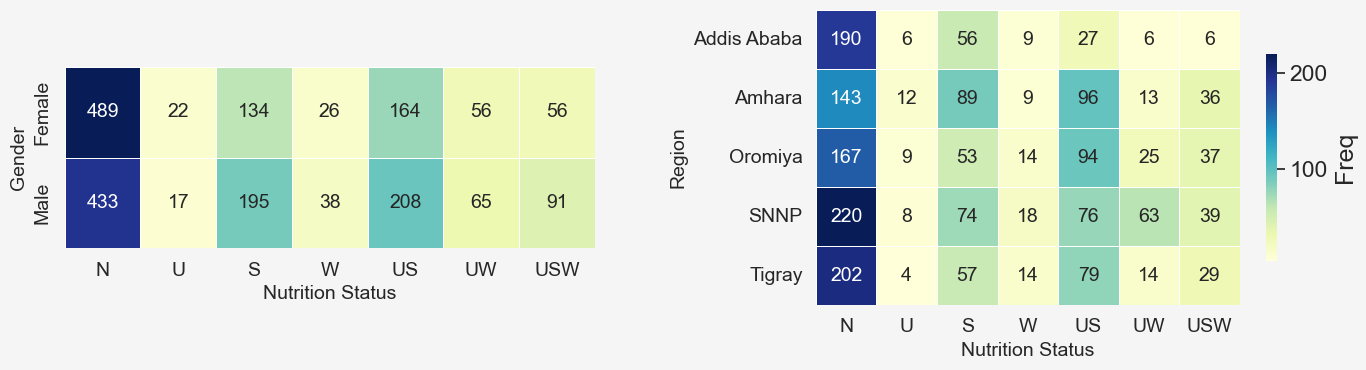

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the desired order for Nutrition_Status
nutrition_order = ["N", "U", "S", "W", "US", "UW", "USW"]

# Reorder the columns for both heatmaps
nutrition_frequencies_region = baseline_data.groupby(['Region', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_region = nutrition_frequencies_region[nutrition_order]  # Reorder columns

nutrition_frequencies_gender = baseline_data.groupby(['ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_gender = nutrition_frequencies_gender[nutrition_order]  # Reorder columns

# Set dynamic figure size based on number of rows
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjusted height to 7 for publication readability


# Set the background color of the figure and axes
fig.patch.set_facecolor('whitesmoke')  # Light gray background for the entire figure

# Use a consistent style for all plots (Seaborn and Matplotlib settings)
sns.set_context("notebook", font_scale=1.5)  # Larger font size for publications
sns.set_style("whitegrid")  # White background with gridlines for readability

# Plot Gender vs Nutrition Status (Left)
sns_heatmap_gender = sns.heatmap(
    nutrition_frequencies_gender,
    cmap="YlGnBu",  # Color palette
    annot=True,  # Show values inside the cells
    fmt="d",  # Format as integer
    linewidths=0.5,  # Thin gridlines
    ax=axes[0],
    annot_kws={"size": 14}, 
    cbar=False,  # Disable color bar for the first heatmap
    vmin=vmin, vmax=vmax
)
# axes[0].set_title("Nutrition Status by Gender", fontsize=18, weight='bold')
axes[0].set_xlabel("Nutrition Status", fontsize=14)
axes[0].set_ylabel("Gender", fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)  # Adjust tick label size

# Adjust Gender subplot height by scaling its aspect ratio
axes[0].set_aspect(3 * len(nutrition_frequencies_gender) / len(nutrition_frequencies_region))

# Plot Region vs Nutrition Status (Right)
sns_heatmap_region = sns.heatmap(
    nutrition_frequencies_region,
    cmap="YlGnBu",  # Color palette
    annot=True,  # Show values inside the cells
    fmt="d",  # Format as integer
    linewidths=0.5,  # Thin gridlines
    ax=axes[1],
    annot_kws={"size": 14}, 
    cbar_kws={"shrink": 0.7, "label": "Freq"}  # Shrink the colorbar and add a label
)

# axes[1].set_title("Nutrition Status by Region", fontsize=18, weight='bold')
axes[1].set_xlabel("Nutrition Status", fontsize=14)
axes[1].set_ylabel("Region", fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)  # Adjust tick label size

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3.0)  # Added padding for better separation between subplots

# Show the plots
plt.show()


## ⚠️ Missing Data Summary (Before Imputation)

In [214]:
# Count the number of missing values for each column
missing_values = baseline_data.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing = missing_values[missing_values > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Measles    85
DPT        85
Polio      85
dtype: int64


## ✅ Missing Data Summary (After Imputation)

In [215]:
# Fill missing values with the mode (most frequent value) for categorical columns
baseline_data_filled = baseline_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

# Count the number of missing values for each column
missing_values_after = baseline_data_filled.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing_after = missing_values_after[missing_values_after > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing_after)

Columns with missing values:
Series([], dtype: int64)


In [216]:
# Count the number of missing values for each column
missing_values = baseline_data_filled.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing = missing_values[missing_values > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Series([], dtype: int64)


## Data Type Correction

In [217]:
# Display the data types of each column
print("Data types of each column in the dataset:")
print(baseline_data_filled.dtypes)

Data types of each column in the dataset:
Subject                            int64
Time                               int64
Nutrition_Status                  object
Region                            object
Residence                         object
ch_sex                            object
ch_age_mon                         int64
BMI                              float64
ch_longterm_health_problem        object
ch_health_compared_peers          object
ch_health_general_new             object
CSW                               object
Care_Edu_New                      object
care_rln_head                     object
care_age                           int64
care_sex                          object
CGSW                              object
Dad_Edu_New                       object
mom_live_location                 object
mom_age                            int64
MOM_Edu_New                       object
Head_Edu_New                      object
head_age                           int64
head_sex       

## 📊 Data Before Handling Outliers

In [218]:
import pandas as pd

# Function to detect outliers using IQR method
def detect_outliers(data, columns):
    outlier_info = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check if there are any outliers
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_info[column] = outliers.any()  # True if any outlier exists, else False
    
    return outlier_info

# Detect outliers in the dataset
outlier_info = detect_outliers(baseline_data_filled, baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns)

# Summary for each column before handling outliers
summary_before = baseline_data_filled.describe().T  # T for transpose
summary_before['Outlier Available'] = [outlier_info[col] for col in summary_before.index]

# Display the summary table before handling outliers
print("Summary before Handling Outliers:")
summary_before[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available']]

Summary before Handling Outliers:


,count,mean,min,25%,50%,75%,max,std,Outlier Available
Subject,1994.0,999.753761,1.000000,500.250000,999.500000,1499.750000,1999.000000,577.206372,False
Time,1994.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,0.000000,False
ch_age_mon,1994.0,11.678034,4.000000,9.000000,12.000000,15.000000,17.000000,3.567941,False
BMI,1994.0,15.880303,8.840761,14.572074,15.787198,17.062017,27.040881,2.142194,True
care_age,1994.0,27.983952,10.000000,23.000000,27.000000,31.000000,70.000000,7.350841,True
mom_age,1994.0,27.455868,15.000000,23.000000,27.000000,31.000000,55.000000,6.417981,True
head_age,1994.0,37.477934,17.000000,30.000000,35.000000,42.000000,110.000000,10.898186,True
hh_size,1994.0,5.721163,2.000000,4.000000,5.000000,7.000000,16.000000,2.153536,True
Num_antenatal_visits,1994.0,2.276830,0.000000,0.000000,1.000000,4.000000,16.000000,2.728673,True
dadage,1994.0,37.107823,19.000000,30.000000,36.000000,42.000000,87.000000,9.172479,True


## 📊 Data After Handling Outliers

In [219]:
def cap_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers to the bounds
        data[column] = data[column].apply(lambda x: max(min(x, upper_bound), lower_bound))
    
    return data

# Handling outliers by capping the values
baseline_data_capped = cap_outliers(baseline_data_filled.copy(), baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns)

# Summary after handling outliers with capping
summary_after_capping = baseline_data_capped.describe().T
summary_after_capping['Outlier Available'] = detect_outliers(baseline_data_capped, summary_after_capping.index)

# Display the summary after handling outliers with capping
print("Summary after Capping Outliers:")
summary_after_capping[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available']]

Summary after Capping Outliers:


,count,mean,min,25%,50%,75%,max,std,Outlier Available
Subject,1994.0,999.753761,1.000000,500.250000,999.500000,1499.750000,1999.000000,577.206372,False
Time,1994.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,0.000000,False
ch_age_mon,1994.0,11.678034,4.000000,9.000000,12.000000,15.000000,17.000000,3.567941,False
BMI,1994.0,15.848517,10.837159,14.572074,15.787198,17.062017,20.796932,2.005206,False
care_age,1994.0,27.740722,11.000000,23.000000,27.000000,31.000000,43.000000,6.587744,False
mom_age,1994.0,27.404213,15.000000,23.000000,27.000000,31.000000,43.000000,6.268223,False
head_age,1994.0,37.166499,17.000000,30.000000,35.000000,42.000000,60.000000,10.009697,False
hh_size,1994.0,5.705617,2.000000,4.000000,5.000000,7.000000,11.500000,2.104185,False
Num_antenatal_visits,1994.0,2.273821,0.000000,0.000000,1.000000,4.000000,10.000000,2.716814,False
dadage,1994.0,36.984453,19.000000,30.000000,36.000000,42.000000,60.000000,8.770032,False


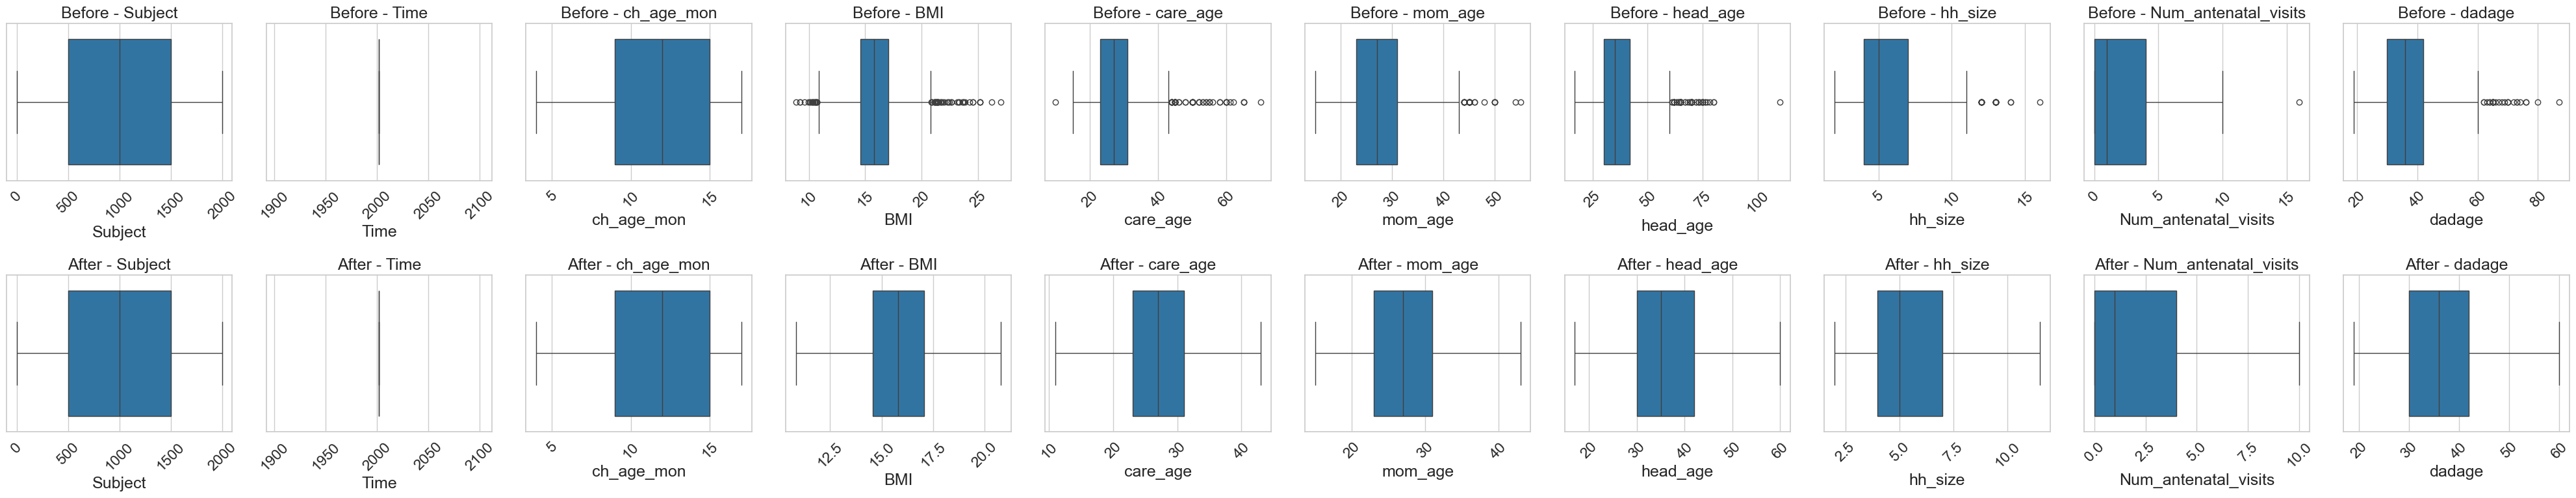

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots for each variable before and after handling outliers with horizontal scroll
def plot_boxplots_before_after(data_before, data_after, columns):
    # Set up the figure with 2 rows and as many columns as variables
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(num_columns * 4, 8))

    # Plotting the first row (before handling outliers)
    for i, column in enumerate(columns):
        sns.boxplot(data=data_before, x=column, ax=axes[0, i])
        axes[0, i].set_title(f'Before - {column}')
        axes[0, i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

    # Plotting the second row (after handling outliers)
    for i, column in enumerate(columns):
        sns.boxplot(data=data_after, x=column, ax=axes[1, i])
        axes[1, i].set_title(f'After - {column}')
        axes[1, i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

    # Adjust the layout to allow horizontal scroll and prevent overlap
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Specify columns to plot
columns_to_plot = baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for the variables before and after handling outliers
plot_boxplots_before_after(baseline_data_filled, baseline_data_capped, columns_to_plot)

## Confirmation

In [221]:
import numpy as np

# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, columns, threshold=3):
    outlier_info = {}
    for column in columns:
        # Calculate Z-scores
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        
        # Check if any Z-score is greater than the threshold (outlier)
        outliers = np.abs(z_scores) > threshold
        outlier_info[column] = outliers.any()  # True if any outlier exists, else False
    
    return outlier_info

# Detect outliers in the dataset using Z-score
outlier_info_zscore = detect_outliers_zscore(baseline_data_capped, baseline_data_capped.select_dtypes(include=["int64", "float64"]).columns)

# Summary to confirm outliers after handling with capping
summary_after_zscore = baseline_data_capped.describe().T
summary_after_zscore['Outlier Available (Z-score)'] = [outlier_info_zscore[col] for col in summary_after_zscore.index]

# Display the summary after using Z-score for outlier detection
print("Summary after Z-score Outlier Detection:")
summary_after_zscore[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available (Z-score)']]

Summary after Z-score Outlier Detection:


,count,mean,min,25%,50%,75%,max,std,Outlier Available (Z-score)
Subject,1994.0,999.753761,1.000000,500.250000,999.500000,1499.750000,1999.000000,577.206372,False
Time,1994.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,0.000000,False
ch_age_mon,1994.0,11.678034,4.000000,9.000000,12.000000,15.000000,17.000000,3.567941,False
BMI,1994.0,15.848517,10.837159,14.572074,15.787198,17.062017,20.796932,2.005206,False
care_age,1994.0,27.740722,11.000000,23.000000,27.000000,31.000000,43.000000,6.587744,False
mom_age,1994.0,27.404213,15.000000,23.000000,27.000000,31.000000,43.000000,6.268223,False
head_age,1994.0,37.166499,17.000000,30.000000,35.000000,42.000000,60.000000,10.009697,False
hh_size,1994.0,5.705617,2.000000,4.000000,5.000000,7.000000,11.500000,2.104185,False
Num_antenatal_visits,1994.0,2.273821,0.000000,0.000000,1.000000,4.000000,10.000000,2.716814,False
dadage,1994.0,36.984453,19.000000,30.000000,36.000000,42.000000,60.000000,8.770032,False


## Show Statistical Summaries

In [222]:
# Function to show statistical summaries for continuous columns
def show_statistical_summary(data):
    # Select continuous (numeric) columns
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    
    # Get the statistical summary of continuous columns
    summary = data[continuous_columns].describe().T  # Transpose for better readability
    
    return summary

# Show statistical summaries for continuous columns in baseline_data_encoded
statistical_summary = show_statistical_summary(baseline_data_encoded)

# Display the statistical summary
print("Statistical Summary of Continuous Columns:")
statistical_summary

Statistical Summary of Continuous Columns:


,count,mean,std,min,25%,50%,75%,max
Subject,1994.0,999.753761,577.206372,1.000000,500.250000,999.500000,1499.750000,1999.000000
Time,1994.0,2002.000000,0.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
ch_age_mon,1994.0,11.678034,3.567941,4.000000,9.000000,12.000000,15.000000,17.000000
BMI,1994.0,15.848517,2.005206,10.837159,14.572074,15.787198,17.062017,20.796932
care_age,1994.0,27.740722,6.587744,11.000000,23.000000,27.000000,31.000000,43.000000
mom_age,1994.0,27.404213,6.268223,15.000000,23.000000,27.000000,31.000000,43.000000
head_age,1994.0,37.166499,10.009697,17.000000,30.000000,35.000000,42.000000,60.000000
hh_size,1994.0,5.705617,2.104185,2.000000,4.000000,5.000000,7.000000,11.500000
Num_antenatal_visits,1994.0,2.273821,2.716814,0.000000,0.000000,1.000000,4.000000,10.000000
dadage,1994.0,36.984453,8.770032,19.000000,30.000000,36.000000,42.000000,60.000000


## Data Visualizations

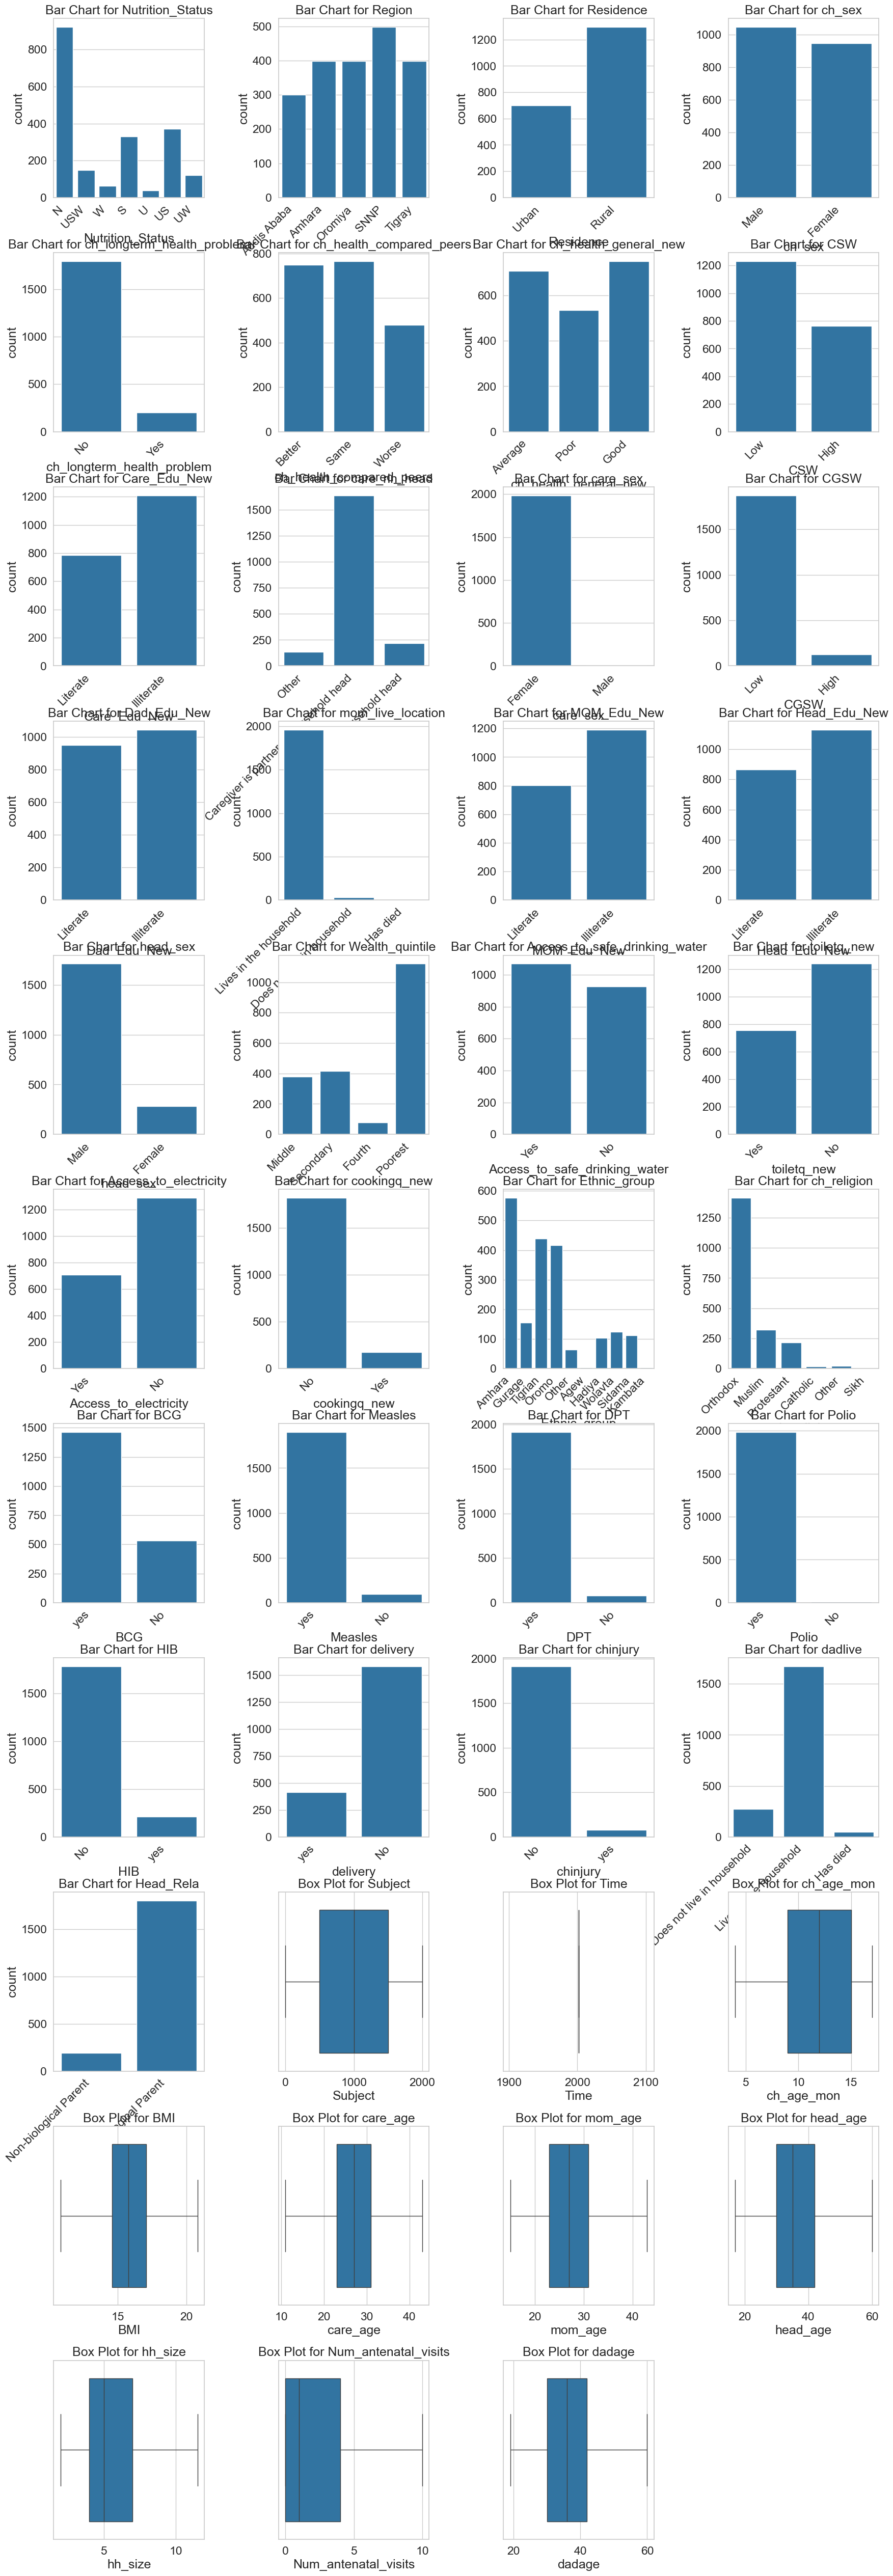

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Function to create data visualizations with horizontal scrolling
def plot_data_visualizations(data):
    # Identify categorical and continuous columns
    categorical_columns = data.select_dtypes(include=["object"]).columns
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    
    # Define number of rows and columns
    num_categorical = len(categorical_columns)
    num_continuous = len(continuous_columns)

    # Set up the figure with a grid of subplots
    num_columns = 4  # Adjust this to control how many plots per row
    num_rows = (num_categorical + num_continuous) // num_columns + 1  # Add a row if not perfectly divisible
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))  # Adjust height
    fig.tight_layout(pad=3.0)  # Adjust spacing

    # Flatten the axes array to easily iterate over them
    axes = axes.flatten()

    # Plot bar charts for categorical columns
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=data, ax=axes[i])
        axes[i].set_title(f'Bar Chart for {column}')
        # Set ticks before setting the labels and rotate
        axes[i].set_xticks(range(len(axes[i].get_xticklabels())))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Plot box plots for continuous columns
    for j, column in enumerate(continuous_columns, start=i + 1):
        sns.boxplot(x=data[column], ax=axes[j])
        axes[j].set_title(f'Box Plot for {column}')
    
    # Remove any extra empty subplots
    for k in range(j + 1, len(axes)):
        axes[k].axis('off')
    
    # Use horizontal scrolling by embedding in HTML (if using Jupyter notebook)
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
    plt.show()

    # HTML to enable horizontal scrolling in Jupyter
    display(HTML('<style>.container { width:100% !important; }</style>'))

# Generate data visualizations for baseline_data_encoded
plot_data_visualizations(baseline_data_capped)


## Correlation heatmap plot

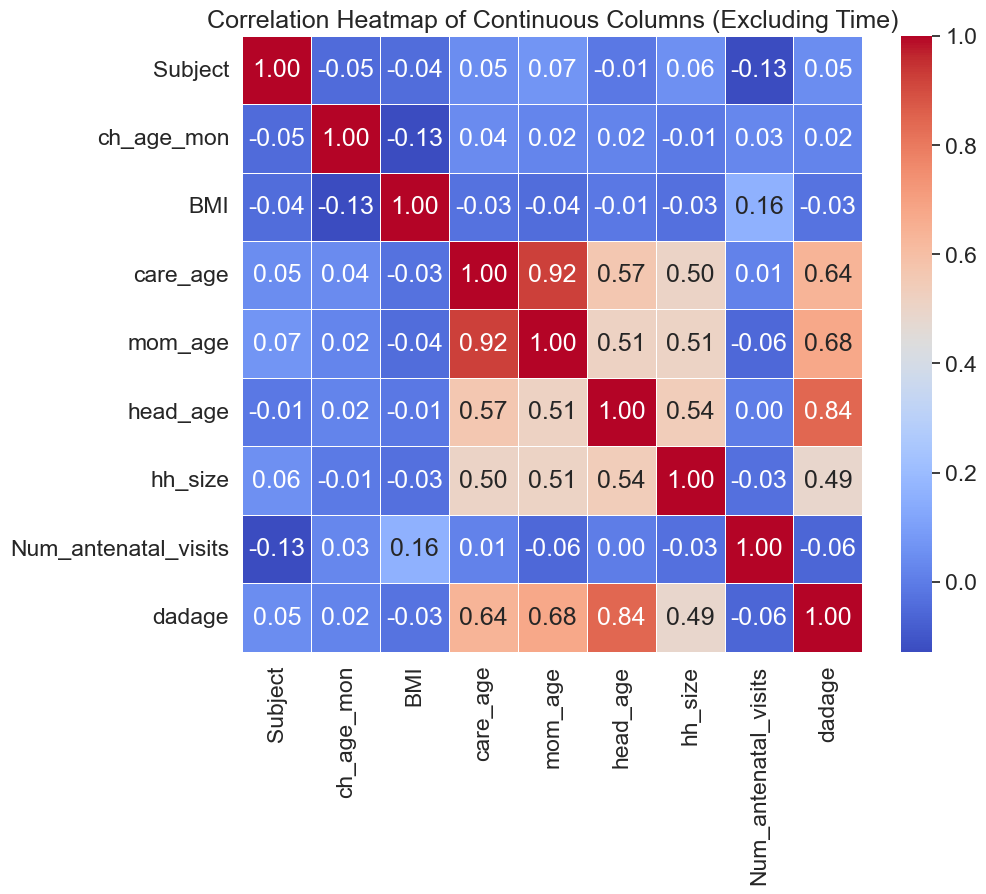

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a heatmap for the correlation matrix excluding 'Time'
def plot_heatmap(data):
    # Select continuous (numeric) columns and exclude 'Time'
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    
    # Remove 'Time' from the list if it exists
    if 'Time' in continuous_columns:
        continuous_columns = continuous_columns[continuous_columns != 'Time']
    
    # Calculate the correlation matrix
    correlation_matrix = data[continuous_columns].corr()

    # Set up the plot
    plt.figure(figsize=(10, 8))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    
    # Set the title
    plt.title('Correlation Heatmap of Continuous Columns (Excluding Time)')
    
    # Display the plot
    plt.show()

# Generate the heatmap for baseline_data_encoded excluding 'Time'
plot_heatmap(baseline_data_capped)

# Target Vs Feature

In [225]:
# Exclude the first three columns and select the rest as independent variables (X)
X_all = baseline_data_capped.iloc[:, 3:].values

# Set the 3rd column (index 2) as the target variable (Y)
Y = baseline_data_capped.iloc[:, 2].values

## 🔠 One-Hot Encoding

In [ ]:
# # Perform One-Hot Encoding on categorical columns
# def one_hot_encode(data, columns):
#     data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)  # drop_first=True to avoid dummy variable trap
#     return data_encoded

# # Identify categorical
# categorical_columns = baseline_data_capped.select_dtypes(include=["object"]).columns

# # Perform One-Hot Encoding
# baseline_data_encoded = one_hot_encode(baseline_data_capped, categorical_columns)

# # Display the encoded data
# print("Data after One-Hot Encoding:")
# baseline_data_encoded.head()


# import pandas as pd

# # Perform One-Hot Encoding on categorical columns
# def one_hot_encode(data, columns):
#     data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)  # drop_first=True to avoid dummy variable trap
#     return data_encoded

# # Convert X back to a DataFrame for selecting categorical columns
# X_df = baseline_data_capped.iloc[:, 3:-1]

# # Identify categorical columns in X_df
# categorical_columns = X_df.select_dtypes(include=["object"]).columns

# # Perform One-Hot Encoding on X_df
# X = one_hot_encode(X_df, categorical_columns)

# # Display the encoded data
# print("X after One-Hot Encoding:")
# X.head()


# Perform One-Hot Encoding on categorical columns
def one_hot_encode(data, columns):
    data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)  # drop_first=True to avoid dummy variable trap
    return data_encoded

# Identify categorical columns
categorical_columns = baseline_data_capped.select_dtypes(include=["object"]).columns

# # Exclude the first 3 columns and the last column
# excluded_columns = list(baseline_data_capped.columns[:3]) + [baseline_data_capped.columns[-1]]
# columns_to_encode = [col for col in categorical_columns if col not in excluded_columns]

# Exclude the first 3 columns and select the second column as the target variable (Y)
excluded_columns = list(baseline_data_capped.columns[:3])  # Exclude the first 3 columns from X
columns_to_encode = [col for col in categorical_columns if col not in excluded_columns]


# Perform One-Hot Encoding
baseline_data_encoded = one_hot_encode(baseline_data_capped, columns_to_encode)

# Display the encoded data
print("Data after One-Hot Encoding:")
baseline_data_encoded.head()

Data after One-Hot Encoding:


,Subject,Time,Nutrition_Status,ch_age_mon,BMI,care_age,mom_age,head_age,hh_size,Num_antenatal_visits,...,BCG_yes,Measles_yes,DPT_yes,Polio_yes,HIB_yes,delivery_yes,chinjury_yes,dadlive_Has died,dadlive_Lives in the household,Head_Rela_Non-biological Parent
0,1,2002,N,14,15.111111,19.0,19.0,43.0,11.5,0.0,...,True,True,True,True,False,True,False,False,False,True
1,2,2002,N,8,16.219723,20.0,20.0,32.0,3.0,8.0,...,True,True,True,True,True,True,False,False,True,False
2,3,2002,USW,12,12.602394,43.0,39.0,60.0,7.0,9.0,...,True,True,True,True,True,True,False,False,False,True
3,4,2002,N,11,18.845467,18.0,35.0,40.0,8.0,0.0,...,True,True,True,True,True,False,False,False,True,False
4,5,2002,N,13,14.167650,28.0,28.0,28.0,6.0,5.0,...,True,True,True,True,False,True,False,False,True,False


# 🧪 Dataset Spliting (Train Vs Test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = baseline_data_encoded.iloc[:, 3:].values

# Y = baseline_data_capped.iloc[:, 2].values
Y = baseline_data_encoded['Nutrition_Status'].values  # Target variable (Nutrition_Status)


# Encode target variable (Y) if it contains categorical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Convert 'N', 'U', etc. to integers

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = []

# Loop through each split ratio
for ratio in split_ratios:
    # Split data into training and testing sets with current ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y_encoded,  # Use the encoded target variable
        test_size=1 - ratio,  # The test size is 1 - ratio
        random_state=42,      # Ensures reproducibility
        stratify=Y_encoded    # Stratified split to maintain class distribution
    )
    
    # Train a machine learning model (RandomForest in this case)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy as an evaluation metric
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results along with shape information for comparison
    results.append({
        'Train/Test Split': f"{int(ratio*100)}:{int((1-ratio)*100)}",  # Explicitly set the ratio
        'X_train': X_train.shape,
        'y_train': y_train.shape,
        'X_test': X_test.shape,
        'y_test': y_test.shape,
        'Accuracy': accuracy
    })

# Convert results into a DataFrame for easy display
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

  Train/Test Split     X_train  y_train     X_test  y_test  Accuracy
0            60:40  (1196, 62)  (1196,)  (798, 62)  (798,)  0.533835
1            70:30  (1395, 62)  (1395,)  (599, 62)  (599,)  0.537563
2            75:25  (1495, 62)  (1495,)  (499, 62)  (499,)  0.543086
3            80:19  (1595, 62)  (1595,)  (399, 62)  (399,)  0.538847
4            85:15  (1694, 62)  (1694,)  (300, 62)  (300,)  0.556667
5             90:9  (1794, 62)  (1794,)  (200, 62)  (200,)  0.580000


# Feature Selection

In [230]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X, Y)

# Get ranking of features
ranking = rfe.ranking_

# Get selected features
# selected_features = baseline_data_encoded.columns[3:-1][ranking == 1]  # Features selected by RFE
selected_features = baseline_data_encoded.columns[3:][ranking == 1]  # Features selected by RFE

print(f"Selected Features: {selected_features}")

Selected Features: Index(['ch_age_mon', 'BMI', 'care_age', 'mom_age', 'head_age', 'hh_size',
       'Num_antenatal_visits', 'dadage', 'ch_health_compared_peers_Same',
       'toiletq_new_Yes'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Get feature importance
importance = model.feature_importances_

# Sort features by importance
indices = np.argsort(importance)[::-1]

# Display feature importance
for i in range(X.shape[1]):
    print(f"{baseline_data_encoded.columns[3:][indices[i]]}: {importance[indices[i]]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices], align="center")
plt.yticks(range(X.shape[1]), baseline_data_encoded.columns[3:-1][indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

BMI: 0.18957124121652133
ch_age_mon: 0.0639076733829
head_age: 0.0585795142319424
dadage: 0.05708457642167984
mom_age: 0.05470140869058975
care_age: 0.05312041806528073
hh_size: 0.04638480904787005
Num_antenatal_visits: 0.03511644216545106
ch_sex_Male: 0.01882141731303039
CSW_Low: 0.016964763000631336
ch_health_general_new_Good: 0.016952597736056327
ch_health_compared_peers_Worse: 0.01657955424236939
ch_health_compared_peers_Same: 0.015974276240477085
BCG_yes: 0.015651610324809058
ch_health_general_new_Poor: 0.015570944322659465
toiletq_new_Yes: 0.015345614662257352
Access_to_safe_drinking_water_Yes: 0.01478621062608982
Dad_Edu_New_Literate: 0.012296119399978765
Wealth_quintile_Poorest: 0.011851826233316726
Head_Edu_New_Literate: 0.011498689332119432
MOM_Edu_New_Literate: 0.01085451090987302
Ethnic_group_Amhara: 0.010539216753732431
Ethnic_group_Oromo: 0.010183888105975238
Access_to_electricity_Yes: 0.010050306967185839
Care_Edu_New_Literate: 0.01003947907238216
Region_Amhara: 0.009517

IndexError: index 61 is out of bounds for axis 0 with size 61

In [4]:
# Exclude the first three columns and select the rest as independent variables (X)
X = baseline_data.iloc[:, 3:-1].values
# target variable column name found the last column
y = baseline_data.iloc[:, -1].values

In [5]:
# Convert the NumPy array to a DataFrame for inspection
X_df = pd.DataFrame(X)

# Check for non-numeric values and data types
# print(X_df.head())
print(X_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())


C:\Users\getne\AppData\Local\Temp\ipykernel_14908\351229467.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_df.applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum())


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30    85
31    85
32    85
33     0
34     0
35     0
36     0
37     0
38     0
dtype: int64


In [6]:
# Convert non-numeric values to NaN and then handle missing values
X_cleaned_df = X_df.apply(pd.to_numeric, errors='coerce')
X_cleaned_df.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs

# Convert back to a NumPy array
X_cleaned = X_cleaned_df.to_numpy()

C:\Users\getne\AppData\Local\Temp\ipykernel_14908\2503071283.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_cleaned_df.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_cleaned)

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

df = pd.read_csv(r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\baseline data.csv")

# Define independent (X) and target variable (y)
X = df.iloc[:, 3:-1].values  # Excluding first 3 columns and last column as target
y = df.iloc[:, -1].values    # Target variable is the last column

# Step 1: Handle missing values (Imputation)
imputer = SimpleImputer(strategy='mean')  # Using mean imputation
X_imputed = imputer.fit_transform(X)

# Step 2: Encode class labels to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts y to sequential numbers

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y_encoded)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 5: Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Convert predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test_original, y_pred_original))

# # Step 9: Save the Model and Encoders
# model_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\nutrition_model.pkl"
# label_encoder_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\label_encoder.pkl"
# scaler_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\scaler.pkl"
# imputer_save_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\imputer.pkl"

# joblib.dump(model, model_save_path)
# joblib.dump(label_encoder, label_encoder_save_path)
# joblib.dump(scaler, scaler_save_path)
# joblib.dump(imputer, imputer_save_path)

# print(f"Model saved to: {model_save_path}")
# print(f"Label encoder saved to: {label_encoder_save_path}")
# print(f"Scaler saved to: {scaler_save_path}")
# print(f"Imputer saved to: {imputer_save_path}")
